## hello world braket example

<div class="alert alert-block alert-info">
This is an example usage of the braket SDK for quantum computing introduced by Amazon AWS
<br>All the following simulations are using the braket SDK local simulator
<br>The information here are based on tutorials I attended and the SDK documentation, please contact me if you have suggestions or notes    

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import numpy as np

from braket.circuits import Circuit
from braket.devices import LocalSimulator

#for Gates query
from braket.circuits import Gate
from braket.circuits import Instruction

#for braket devices
from braket.aws import AwsDevice

In [2]:
!pip show amazon-braket-sdk

Name: amazon-braket-sdk
Version: 1.31.2.dev0
Summary: An open source library for interacting with quantum computing devices on Amazon Braket
Home-page: https://github.com/aws/amazon-braket-sdk-python
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /home/ec2-user/anaconda3/envs/Braket/lib/python3.7/site-packages
Requires: amazon-braket-default-simulator, amazon-braket-schemas, backoff, boltons, boto3, nest-asyncio, networkx, numpy, openpulse, openqasm3, sympy
Required-by: amazon-braket-ocean-plugin, amazon-braket-pennylane-plugin, amazon-braket-strawberryfields-plugin


## Bell state circuit

Here comes a Bell state with two qubits

In [3]:
bell = Circuit().h(0).cnot(control=0, target=1)
print(bell)

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


## Submit the circuit to the local simulator and obtain the results

Here we submit our circuit to the local simulator and obtain the results.

In [4]:
# set up device
device = LocalSimulator()
# run circuit
result = device.run(bell, shots=100).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 53, '11': 47})


Text(0, 0.5, 'counts')

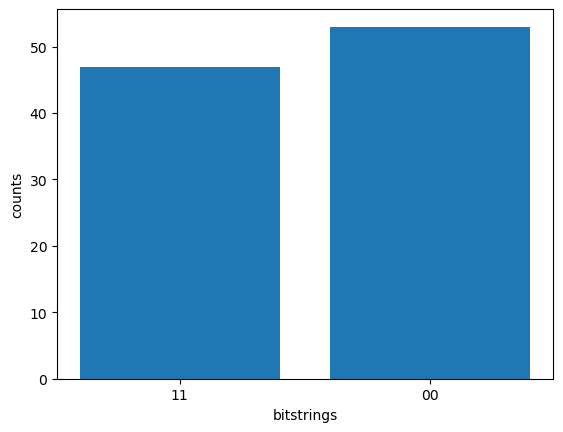

In [5]:
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

### Let's complicate the circuit abit more

<div class="alert alert-block alert-info">
 <b>dive deep!</b> let's try other gates and maybe add random rotations or implement a circuit we tried before </br>  supported gates <a href="https://docs.aws.amazon.com/braket/latest/developerguide/braket-constructing-circuit.html#braket-gates">in the developer guide</a>.
</br>The source code for gate definitions are available in braket.circuit <a href="https://github.com/aws/amazon-braket-sdk-python/blob/main/src/braket/circuits/circuit.py"> in the braket source code</a>

Many of the examples here and text are following Braket tutorials and the SDK documentations
</div>

In [6]:
#let's make the circuit with 4qubits
bell_4q = Circuit().h(range(4)).cnot(control = 0, target = 2).cnot(control = 1, target = 3)
print(bell_4q)

T  : |0| 1 |
            
q0 : -H-C---
        |   
q1 : -H-|-C-
        | | 
q2 : -H-X-|-
          | 
q3 : -H---X-

T  : |0| 1 |


Counter({'00': 59, '11': 41})


Text(0, 0.5, 'counts')

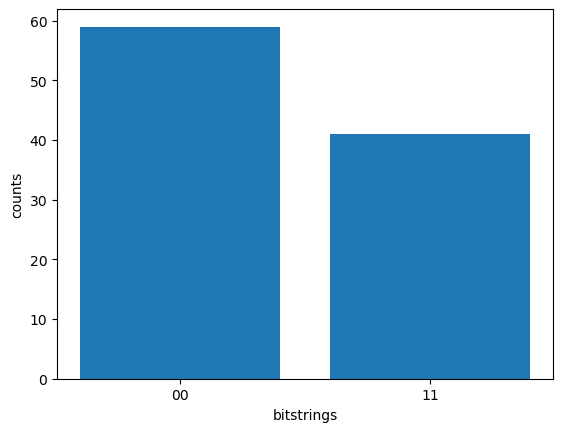

In [7]:
# let's simulate it
device = LocalSimulator()
result = device.run(bell, shots=100).result()
counts = result.measurement_counts
print(counts)
# Let's plot using counts
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

In [8]:
# what are the available Gates in Circuit()
gate_set = [attr for attr in dir(Gate) if attr[0] in string.ascii_uppercase]
print(gate_set)

['CCNot', 'CNot', 'CPhaseShift', 'CPhaseShift00', 'CPhaseShift01', 'CPhaseShift10', 'CSwap', 'CV', 'CY', 'CZ', 'ECR', 'GPi', 'GPi2', 'H', 'I', 'ISwap', 'MS', 'PSwap', 'PhaseShift', 'PulseGate', 'Rx', 'Ry', 'Rz', 'S', 'Si', 'Swap', 'T', 'Ti', 'Unitary', 'V', 'Vi', 'X', 'XX', 'XY', 'Y', 'YY', 'Z', 'ZZ']


In [9]:
#let's play abit with those gates
gates_circuit = Circuit()

In [10]:
# toffoli gate with q0, q1 the control qubits and q2 the target.
gates_circuit = gates_circuit.ccnot(0, 1, 2)
print(gates_circuit)

T  : |0|
        
q0 : -C-
      | 
q1 : -C-
      | 
q2 : -X-

T  : |0|


In [11]:
# cnot gate
gates_circuit = gates_circuit.cnot(0, 1)
print(gates_circuit)

T  : |0|1|
          
q0 : -C-C-
      | | 
q1 : -C-X-
      |   
q2 : -X---

T  : |0|1|


In [12]:
# controlled-phase gate that phases the |11> state, cphaseshift(phi) = diag((1,1,1,exp(1j*phi))), where phi=0.15 in the examples below
gates_circuit = gates_circuit.cphaseshift(0, 1, 0.15)
print(gates_circuit)

T  : |0|1|     2     |
                      
q0 : -C-C-C-----------
      | | |           
q1 : -C-X-PHASE(0.15)-
      |               
q2 : -X---------------

T  : |0|1|     2     |


In [13]:
# controlled-phase gate that phases the |00> state, cphaseshift00(phi) = diag([exp(1j*phi),1,1,1])
gates_circuit = gates_circuit.cphaseshift00(0, 1, 0.15)
print(gates_circuit)

T  : |0|1|     2     |      3      |
                                    
q0 : -C-C-C-----------C-------------
      | | |           |             
q1 : -C-X-PHASE(0.15)-PHASE00(0.15)-
      |                             
q2 : -X-----------------------------

T  : |0|1|     2     |      3      |


In [14]:
# controlled-phase gate that phases the |01> state, cphaseshift01(phi) = diag([1,exp(1j*phi),1,1])
gates_circuit = gates_circuit.cphaseshift01(0, 1, 0.15)
print(gates_circuit)

T  : |0|1|     2     |      3      |      4      |
                                                  
q0 : -C-C-C-----------C-------------C-------------
      | | |           |             |             
q1 : -C-X-PHASE(0.15)-PHASE00(0.15)-PHASE01(0.15)-
      |                                           
q2 : -X-------------------------------------------

T  : |0|1|     2     |      3      |      4      |


In [15]:
# controlled-phase gate that phases the |10> state, cphaseshift10(phi) = diag([1,1,exp(1j*phi),1])
gates_circuit = gates_circuit.cphaseshift10(0, 1, 0.15)
print(gates_circuit)

T  : |0|1|     2     |      3      |      4      |      5      |
                                                                
q0 : -C-C-C-----------C-------------C-------------C-------------
      | | |           |             |             |             
q1 : -C-X-PHASE(0.15)-PHASE00(0.15)-PHASE01(0.15)-PHASE10(0.15)-
      |                                                         
q2 : -X---------------------------------------------------------

T  : |0|1|     2     |      3      |      4      |      5      |


In [16]:
# controlled swap gate
gates_circuit = gates_circuit.cswap(0, 1, 2)
print(gates_circuit)

T  : |0|1|     2     |      3      |      4      |      5      | 6  |
                                                                     
q0 : -C-C-C-----------C-------------C-------------C-------------C----
      | | |           |             |             |             |    
q1 : -C-X-PHASE(0.15)-PHASE00(0.15)-PHASE01(0.15)-PHASE10(0.15)-SWAP-
      |                                                         |    
q2 : -X---------------------------------------------------------SWAP-

T  : |0|1|     2     |      3      |      4      |      5      | 6  |


In [17]:
# swap gate
gates_circuit = gates_circuit.swap(0,1)
print(gates_circuit)

T  : |0|1|     2     |      3      |      4      |      5      | 6  | 7  |
                                                                          
q0 : -C-C-C-----------C-------------C-------------C-------------C----SWAP-
      | | |           |             |             |             |    |    
q1 : -C-X-PHASE(0.15)-PHASE00(0.15)-PHASE01(0.15)-PHASE10(0.15)-SWAP-SWAP-
      |                                                         |         
q2 : -X---------------------------------------------------------SWAP------

T  : |0|1|     2     |      3      |      4      |      5      | 6  | 7  |


In [18]:
# phaseshift(phi)= diag([1,exp(1j*phi)])
gates_circuit = gates_circuit.phaseshift(0,0.15)
print(gates_circuit)

T  : |0|1|     2     |      3      |      4      |      5      | 6  | 7  |     8     |
                                                                                      
q0 : -C-C-C-----------C-------------C-------------C-------------C----SWAP-PHASE(0.15)-
      | | |           |             |             |             |    |                
q1 : -C-X-PHASE(0.15)-PHASE00(0.15)-PHASE01(0.15)-PHASE10(0.15)-SWAP-SWAP-------------
      |                                                         |                     
q2 : -X---------------------------------------------------------SWAP------------------

T  : |0|1|     2     |      3      |      4      |      5      | 6  | 7  |     8     |


In [19]:
# controlled Y gate
gates_circuit = gates_circuit.cy(0, 1)
print(gates_circuit)

T  : |0|1|     2     |      3      |      4      |      5      | 6  | 7  |     8     |9|
                                                                                        
q0 : -C-C-C-----------C-------------C-------------C-------------C----SWAP-PHASE(0.15)-C-
      | | |           |             |             |             |    |                | 
q1 : -C-X-PHASE(0.15)-PHASE00(0.15)-PHASE01(0.15)-PHASE10(0.15)-SWAP-SWAP-------------Y-
      |                                                         |                       
q2 : -X---------------------------------------------------------SWAP--------------------

T  : |0|1|     2     |      3      |      4      |      5      | 6  | 7  |     8     |9|


In [20]:
# controlled phase gate
gates_circuit = gates_circuit.cz(0, 1)
print(gates_circuit)

T  : |0|1|     2     |      3      |      4      |      5      | 6  | 7  |     8     |9|10|
                                                                                           
q0 : -C-C-C-----------C-------------C-------------C-------------C----SWAP-PHASE(0.15)-C-C--
      | | |           |             |             |             |    |                | |  
q1 : -C-X-PHASE(0.15)-PHASE00(0.15)-PHASE01(0.15)-PHASE10(0.15)-SWAP-SWAP-------------Y-Z--
      |                                                         |                          
q2 : -X---------------------------------------------------------SWAP-----------------------

T  : |0|1|     2     |      3      |      4      |      5      | 6  | 7  |     8     |9|10|


In [21]:
# Let's make a newer gates_circuit2 to continue playing!
gates_circuit2 = Circuit()

In [22]:
# Echoed cross-resonance gate applied to q0, q1
gates_circuit2 = gates_circuit2.ecr(0,1)
print(gates_circuit2)

T  : | 0 |
          
q0 : -ECR-
      |   
q1 : -ECR-

T  : | 0 |


In [23]:
# X rotation with angle 0.15
gates_circuit2 = gates_circuit2.rx(0, 0.15)
print(gates_circuit2)

T  : | 0 |   1    |
                   
q0 : -ECR-Rx(0.15)-
      |            
q1 : -ECR----------

T  : | 0 |   1    |


In [24]:
# Y rotation with angle 0.15
gates_circuit2 = gates_circuit2.ry(0, 0.15)
print(gates_circuit2)

T  : | 0 |   1    |   2    |
                            
q0 : -ECR-Rx(0.15)-Ry(0.15)-
      |                     
q1 : -ECR-------------------

T  : | 0 |   1    |   2    |


In [25]:
# Z rotation with angle 0.15
gates_circuit2 = gates_circuit2.rz(0, 0.15)
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |
                                     
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-
      |                              
q1 : -ECR----------------------------

T  : | 0 |   1    |   2    |   3    |


In [26]:
# Hadamard gates applied to q0, q1, q2
gates_circuit2 = gates_circuit2.h(range(3))
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|
                                       
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-
      |                                
q1 : -ECR-H----------------------------
                                       
q2 : -H--------------------------------

T  : | 0 |   1    |   2    |   3    |4|


In [27]:
# iswap gate, iswap = [[1,0,0,0],[0,0,1j,0],[0,1j,0,0],[0,0,0,1]]
gates_circuit2 = gates_circuit2.iswap(0, 1)
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |
                                             
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-
      |                                |     
q1 : -ECR-H----------------------------ISWAP-
                                             
q2 : -H--------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |


In [28]:
# pswap gate, PSWAP(phi) = [[1,0,0,0],[0,0,exp(1j*phi),0],[0,exp(1j*phi),0,0],[0,0,0,1]]
gates_circuit2 = gates_circuit2.pswap(0, 1, 0.15)
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |
                                                         
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-
      |                                |     |           
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-
                                                         
q2 : -H--------------------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |


In [29]:
# X gate applied to q1, q2
gates_circuit2 = gates_circuit2.x([1, 2])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|
                                                           
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)---
      |                                |     |             
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-
                                                           
q2 : -H---X------------------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|


In [30]:
# Y gate applied to q1, q2
gates_circuit2 = gates_circuit2.y([1, 2])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8|
                                                             
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-----
      |                                |     |               
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y-
                                                             
q2 : -H---X--------Y-----------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8|


In [31]:
# Z gate applied to q1, q2
gates_circuit2 = gates_circuit2.z([1, 2])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8|9|
                                                               
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-------
      |                                |     |                 
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y-Z-
                                                               
q2 : -H---X--------Y--------Z----------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8|9|


In [32]:
# S gate applied to q0, q1, q2
gates_circuit2 = gates_circuit2.s([0, 1, 2])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8|9|10|
                                                                  
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S--------
      |                                |     |                    
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y-Z-S--
                                                                  
q2 : -H---X--------Y--------Z--------S----------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8|9|10|


In [33]:
# conjugate transpose of S gate applied to q0, q1
gates_circuit2 = gates_circuit2.si([0, 1])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|
                                                                      
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si---------
      |                                |     |                        
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-
                                                                      
q2 : -H---X--------Y--------Z--------S--------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|


In [34]:
# T gate applied to q0, q1
gates_circuit2 = gates_circuit2.t([0, 1])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|
                                                                         
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si-T----------
      |                                |     |                           
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-T--
                                                                         
q2 : -H---X--------Y--------Z--------S-----------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|


In [35]:
# conjugate transpose of T gate applied to q0, q1
gates_circuit2 = gates_circuit2.ti([0, 1])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|
                                                                            
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si-T-Ti----------
      |                                |     |                              
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-T--Ti-
                                                                            
q2 : -H---X--------Y--------Z--------S--------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|


In [36]:
# square root of not gate applied to q0, q1, q2
gates_circuit2 = gates_circuit2.v([0, 1, 2])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|
                                                                               
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si-T-Ti-V-----------
      |                                |     |                                 
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-T--Ti-V--
                                                                               
q2 : -H---X--------Y--------Z--------S-V---------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|


In [37]:
# conjugate transpose of square root of not gate applied to q0, q1, q2
gates_circuit2 = gates_circuit2.vi([0, 1, 2])
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|
                                                                                  
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si-T-Ti-V--Vi----------
      |                                |     |                                    
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-T--Ti-V--Vi-
                                                                                  
q2 : -H---X--------Y--------Z--------S-V-----Vi-----------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|


In [38]:
# exp(i(XX+YY) theta/4), where theta=0.15 in the examples below
gates_circuit2 = gates_circuit2.xx(0, 1, 0.15)
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|   16   |
                                                                                           
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si-T-Ti-V--Vi----------XX(0.15)-
      |                                |     |                                    |        
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-T--Ti-V--Vi-XX(0.15)-
                                                                                           
q2 : -H---X--------Y--------Z--------S-V-----Vi--------------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|   16   |


In [39]:
# exp(-iXY theta/2)
gates_circuit2 = gates_circuit2.xy(0, 1, 0.15)
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|   16   |   17   |
                                                                                                    
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si-T-Ti-V--Vi----------XX(0.15)-XY(0.15)-
      |                                |     |                                    |        |        
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-T--Ti-V--Vi-XX(0.15)-XY(0.15)-
                                                                                                    
q2 : -H---X--------Y--------Z--------S-V-----Vi-----------------------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|   16   |   17   |


In [40]:
# exp(-iYY theta/2)
gates_circuit2 = gates_circuit2.yy(0, 1, 0.15)
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|   16   |   17   |   18   |
                                                                                                             
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si-T-Ti-V--Vi----------XX(0.15)-XY(0.15)-YY(0.15)-
      |                                |     |                                    |        |        |        
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-T--Ti-V--Vi-XX(0.15)-XY(0.15)-YY(0.15)-
                                                                                                             
q2 : -H---X--------Y--------Z--------S-V-----Vi--------------------------------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|   16   |   17   |   18   |


In [41]:
# exp(-iZZ theta/2)
gates_circuit2 = gates_circuit2.zz(0, 1, 0.15)
print(gates_circuit2)

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|   16   |   17   |   18   |   19   |
                                                                                                                      
q0 : -ECR-Rx(0.15)-Ry(0.15)-Rz(0.15)-H-ISWAP-PSWAP(0.15)-S-Si-T-Ti-V--Vi----------XX(0.15)-XY(0.15)-YY(0.15)-ZZ(0.15)-
      |                                |     |                                    |        |        |        |        
q1 : -ECR-H----------------------------ISWAP-PSWAP(0.15)-X-Y--Z-S--Si-T--Ti-V--Vi-XX(0.15)-XY(0.15)-YY(0.15)-ZZ(0.15)-
                                                                                                                      
q2 : -H---X--------Y--------Z--------S-V-----Vi-----------------------------------------------------------------------

T  : | 0 |   1    |   2    |   3    |4|  5  |     6     |7|8 |9|10|11|12|13|14|15|   16   |   17   |   18   |   19   |


In [42]:
# identity gates applied to q0, q1, q2
gates_circuit2.i([0, 1, 2])

Circuit('instructions': [Instruction('operator': ECR('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': Rx('angle': 0.15, 'qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': Ry('angle': 0.15, 'qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': Rz('angle': 0.15, 'qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(1)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(2)])), Instruction('operator': ISwap('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': PSwap('angle': 0.15, 'qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(1)])), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(2)])), Instruction('o

In [43]:
# very simple circuit
simple_circuit = Circuit()
# let's apply Hadamard gate 
simple_circuit = simple_circuit.h(0)
print(simple_circuit)

T  : |0|
        
q0 : -H-

T  : |0|


#### retrieve circuit instructions

In [44]:
simple_circuit.i([0])

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': I('qubit_count': 1), 'target': QubitSet([Qubit(0)]))])

### applying self-defined unitary gates to the circuit

In [45]:
#single-qubit gates applied to 1st qubit
unitary_matrix = np.array([[0,1],[1,0]])
unitary_1q_circuit = Circuit()
unitary_1q_circuit.unitary(matrix = unitary_matrix, targets = [0])
print(unitary_1q_circuit)

T  : |0|
        
q0 : -U-

T  : |0|


##  constructing circuits by specifying instructions
as shown in the example above, an Instruction is a quantum directive that describes the task to perform on a quantum device. Instruction operators include objects of type Gate only

In [46]:
instr_list = [Instruction(Gate.H(), 0)]
circuit_instr = Circuit(instr_list)
print(circuit_instr)

T  : |0|
        
q0 : -H-

T  : |0|


In [47]:
# let's add instruction
instr_tmp = Instruction(Gate.CNot(), [0, 1])
circuit_instr.add_instruction(instr_tmp)
print(circuit_instr)

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


In [48]:
# specify where the circuit is appended and reuse an old instruction
circuit_instr.add_instruction(instr_tmp, target=[3, 4])
circuit_instr.add_instruction(instr_tmp, target_mapping={0: 3, 1: 4})
print(circuit_instr)

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-
          
q3 : -C-C-
      | | 
q4 : -X-X-

T  : |0|1|


In [49]:
# print the instructions applied to a specific circuit
print(circuit_instr.instructions)

[Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(3), Qubit(4)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(3), Qubit(4)]))]


In [50]:
circuit_instr.i

<bound method Circuit.register_subroutine.<locals>.method_from_subroutine of Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(3), Qubit(4)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(3), Qubit(4)]))])>

In [51]:
#for better formatting
for instr in circuit_instr.instructions:
     print(instr)

Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]))
Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]))
Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(3), Qubit(4)]))
Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(3), Qubit(4)]))


In [52]:
# instructions can be copied
new_instr = instr_tmp.copy()
print(new_instr)

Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]))


## query gates supported on real quantum computer devices available through AWS Braket

In [53]:
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")

In [54]:
device

Device('name': IonQ Device, 'arn': arn:aws:braket:::device/qpu/ionq/ionQdevice)

In [55]:
print(device.name)

IonQ Device


In [56]:
# show supportedQuantumOperations (supported gates for a device)
device_operations = device.properties.dict()['action']['braket.ir.jaqcd.program']['supportedOperations']
print('Quantum Gates supported by {}:\n {}'.format(device.name, device_operations))

Quantum Gates supported by IonQ Device:
 ['x', 'y', 'z', 'rx', 'ry', 'rz', 'h', 'cnot', 's', 'si', 't', 'ti', 'v', 'vi', 'xx', 'yy', 'zz', 'swap', 'i']


In [57]:
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2")

# get device name
device_name = device.name
# show supportedQuantumOperations (supported gates for a device)
device_operations = device.properties.dict()['action']['braket.ir.jaqcd.program']['supportedOperations']
print('Quantum Gates supported by {}:\n {}'.format(device.name, device_operations))

Quantum Gates supported by Aspen-M-2:
 ['cz', 'xy', 'ccnot', 'cnot', 'cphaseshift', 'cphaseshift00', 'cphaseshift01', 'cphaseshift10', 'cswap', 'h', 'i', 'iswap', 'phaseshift', 'pswap', 'rx', 'ry', 'rz', 's', 'si', 'swap', 't', 'ti', 'x', 'y', 'z', 'start_verbatim_box', 'end_verbatim_box']


## Next step

<div class="alert alert-block alert-info">
 <b>dive deeper!</b> I can advice to dive deep in <a href="https://docs.aws.amazon.com/braket/latest/developerguide/braket-constructing-circuit.html#manual-qubit-allocation"> for manual qubit allocation</a> on the quantum device to manually allocate the qubits and apply the circuit algorithm in the developer guide.
</div>

<div class="alert alert-block alert-info">
 <b>simulate noise!</b> Noise is very important to consider for the NISQ devices, please refer to more detailed info and examples regarding <a href="https://docs.aws.amazon.com/braket/latest/developerguide/braket-constructing-circuit.html#noise-simulation"> simulating noise to different quantum devices </a>.
</div>